In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

C:\Users\Jacob\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets("./MNIST_Data", one_hot=False)
train = mnist.train.next_batch(1000)
trainX = train[0]
trainY = train[1]

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_Data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_Data\train-labels-idx1-ubyte.gz
Extracting ./MNIST_Data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_Data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


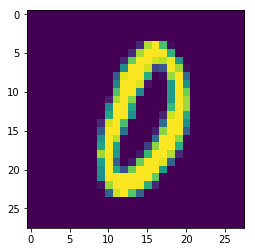

In [3]:
plt.imshow(train[0][0].reshape(28, 28))

In [9]:
tf.reset_default_graph() 

sess= tf.Session()

hiddenlayersize=128

W1 = tf.get_variable("W1", [trainX.shape[1], hiddenlayersize], initializer=tf.truncated_normal_initializer(stddev=0.1))

W2 = tf.get_variable("W2", [hiddenlayersize, 10], initializer=tf.truncated_normal_initializer(0.1))

epochs = 5000

x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.int64)

lr = 0.05

Z1=tf.matmul(x, W1)

B1 = tf.get_variable("B1", [hiddenlayersize], initializer=tf.truncated_normal_initializer(0.1))

H1 = tf.nn.relu(Z1 + B1)

Z2=tf.matmul(H1, W2)

B2 = tf.get_variable("B2", [10], initializer=tf.truncated_normal_initializer(0.1))

model = tf.nn.softmax(tf.nn.relu(Z2 + B2))


loss= tf.losses.sparse_softmax_cross_entropy(labels=y, logits=model)


global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 0.1
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           100000, 0.96, staircase=True)

optimizer=tf.train.GradientDescentOptimizer(learning_rate)
train=optimizer.minimize(loss)

sess.run(tf.global_variables_initializer())


In [10]:

for i in range(5000):
  
    #sess.run(train,{x:trainX, y:trainY, learning_rate:0.5})
    
    batch_x, batch_y = mnist.train.next_batch(100)
    sess.run(train, feed_dict={x: batch_x, y: batch_y})
    
    if i % 500 == 0: 
        
        l_cost = sess.run(loss, feed_dict={x:trainX, y:trainY})
        print(f"i: {i} cost: {l_cost}")


i: 0 cost: 2.3482744693756104
i: 500 cost: 1.9617362022399902
i: 1000 cost: 1.9540048837661743
i: 1500 cost: 1.858171820640564
i: 2000 cost: 1.852813720703125
i: 2500 cost: 1.849676489830017
i: 3000 cost: 1.8467280864715576
i: 3500 cost: 1.8436144590377808
i: 4000 cost: 1.799196481704712
i: 4500 cost: 1.7766375541687012


In [11]:
correct_prediction = tf.equal(tf.argmax(model, 1), y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(
  accuracy, feed_dict={
      x: mnist.test.images,
      y: mnist.test.labels
  }))

0.6786


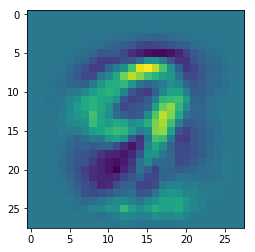

In [111]:
plt.imshow(weights[:, 9].reshape(28, 28))